## Import Libraries

In [194]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, 
                                 OrdinalEncoder, PolynomialFeatures,
                                 FunctionTransformer)

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset And Get Info


In [195]:
df = pd.read_csv('heart_corrupted.csv')
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1032,39 years,##,ASY,113,281,0,Normal,156,NaN,0.0,Flat,1
1214,60,M,ASY,112,0,1,Normal,84,No,-0.2,Flat,1
1123,63,Male,ASY,143,305,1,ST,117,NaN,1.8,Flat,1
180,52,M,ASY,130,225,0,Normal,120,Yes,2.0,Flat,1
201,46,M,NAP,120,230,0,Normal,150,No,0.0,Up,0


In [196]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 2870
Number of Columns : 12


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2870 non-null   object 
 1   Sex             2797 non-null   object 
 2   ChestPainType   2870 non-null   object 
 3   RestingBP       2786 non-null   object 
 4   Cholesterol     2785 non-null   object 
 5   FastingBS       2870 non-null   int64  
 6   RestingECG      2870 non-null   object 
 7   MaxHR           2791 non-null   object 
 8   ExerciseAngina  1722 non-null   object 
 9   Oldpeak         2870 non-null   float64
 10  ST_Slope        2870 non-null   object 
 11  HeartDisease    2870 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 269.2+ KB


In [198]:
# Check NaN Value
df.isna().sum()  #np.nan

Age                  0
Sex                 73
ChestPainType        0
RestingBP           84
Cholesterol         85
FastingBS            0
RestingECG           0
MaxHR               79
ExerciseAngina    1148
Oldpeak              0
ST_Slope             0
HeartDisease         0
dtype: int64

In [199]:
df.dtypes

Age                object
Sex                object
ChestPainType      object
RestingBP          object
Cholesterol        object
FastingBS           int64
RestingECG         object
MaxHR              object
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [200]:
# Describe 
df.describe()

,FastingBS,Oldpeak,HeartDisease
count,2870.00000,2870.000000,2870.000000
mean,0.29338,1.149164,0.852962
std,0.45539,1.062972,0.354206
min,0.00000,-2.600000,0.000000
25%,0.00000,0.000000,1.000000
50%,0.00000,1.100000,1.000000
75%,1.00000,1.800000,1.000000
max,1.00000,6.200000,1.000000


In [201]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Age,2870,0,0.000000,150
Sex,2870,73,2.543554,7
ChestPainType,2870,0,0.000000,4
RestingBP,2870,84,2.926829,105
Cholesterol,2870,85,2.961672,294
FastingBS,2870,0,0.000000,2
RestingECG,2870,0,0.000000,3
MaxHR,2870,79,2.752613,134
ExerciseAngina,2870,1148,40.000000,2
Oldpeak,2870,0,0.000000,69


In [202]:
# Check Dublication
df.duplicated().sum()

55

There are many and many issues in the data.
* Change `Age`, `RestingBP`, `MaxHR` and `Cholesterol` columns' type to integer .
* Handle inconsistent formats.
* Handle missng data.
* Handle outliers.
* Check about non realistic values in `RestingBP`, `Cholesterol`, and `Oldpeak` columns.
* Remove duplicated data


## Data Cleaning 

#### Remove duplicated

In [203]:
df.drop_duplicates(inplace=True)

#### Clean Age Column

In [204]:
df['Age'].unique()

array(['40', '49', '37', '48', '54', '39', '45', '58', '42', '38', '43',
       '60', '36', '44', '53', '52', '51', '53 years', '56', '54 years',
       '41', '32', '65', '35', '590', '50', '47', '310', '46 years',
       '57 y', '55', '46', '63', '66', '480', '400', '57', '34', '59',
       '33', '58 years', '61', '50 years', '29', '43 year', '37 years',
       '410', '62', '490', '31', '28', '30', '41 year', '51 y',
       '57 years', '74', '68', '630', '46 yr', '72', '64', '69',
       '55 years', '67', '570', '73', '70', '53 yr', '65 y', '66 yr',
       '77', '52 years', '40 years', '56 years', '75', '610', '76', '700',
       '71', '710', '380', '640', '61 y', '510', '55 yr', '44 years',
       '51 year', '60 y', '60 year', '66 years', '52 y', '670', '620',
       '50 y', '60 years', '62 years', '43 years', '520', '560',
       '71 years', '42 y', '500', '39 years', '750', '61 years', '37 y',
       '660', '65 years', '56 year', '44 year', '600', '53 y', '64 years',
       '460', 

Mmm! Let's remove non-numeric suffixes like `67 years` `63 y` , convert values to integer, and handle outliers like `690` and so on.

In [205]:
df['Age'] = df['Age'].str.replace(r'\s*(years?|yrs?|y)\s*', '', regex=True)

In [206]:
df['Age'].unique()

array(['40', '49', '37', '48', '54', '39', '45', '58', '42', '38', '43',
       '60', '36', '44', '53', '52', '51', '56', '41', '32', '65', '35',
       '590', '50', '47', '310', '46', '57', '55', '63', '66', '480',
       '400', '34', '59', '33', '61', '29', '410', '62', '490', '31',
       '28', '30', '74', '68', '630', '72', '64', '69', '67', '570', '73',
       '70', '77', '75', '610', '76', '700', '71', '710', '380', '640',
       '510', '670', '620', '520', '560', '500', '750', '660', '600',
       '460', '470', '430', '650', '550', '330', '420', '580'],
      dtype=object)

In [207]:
df['Age'] = df['Age'].astype(int) 

Let's remove outliers.

If you notice that all outliers values end with a `0` so all we do is dividing those values by 10.
(the reason of outliers is the some values is multiplied by 10)

In [208]:
df['Age'] = df['Age'].apply(lambda x: x // 10 if x > 100 and x % 10 == 0 else x)

In [209]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

#### Clean Sex Column

In [210]:
df['Sex'].value_counts()

Sex
M            1402
Male          946
F             186
Female        137
undefined      26
##             25
??             20
Name: count, dtype: int64

It seems so dirty. Let's normalize values to consistent format and replace `##`, `undefined` and `??` values with NaN


In [211]:
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})

In [212]:
df['Sex'] = df['Sex'].apply(lambda x: np.nan if x in ['##', 'undefined', '??'] else x)

In [213]:
df['Sex'].unique()

array(['Male', 'Female', nan], dtype=object)

In [214]:
df['Sex'].isna().sum() / df.shape[0] * 100

5.1154529307282415

#### Clean RestingBP, MaxHR and Cholesterol Columns

In [215]:
df['RestingBP'].unique()

array(['140', '160', '130', '138', '150', '120', '110', '136', '115',
       '100', '124', '113', '125', '145', 'undefined', nan, '112', '132',
       '118', '170', '142', '##', '190', '135', '180', '108', '155',
       '128', '106', '92', '200', '122', '105', '133', '95', '137', '185',
       '165', '126', '152', '116', '0', '144', '154', '134', '104', '139',
       '131', '141', '178', '146', '158', '123', '102', '96', '143',
       '172', '??', '156', '114', '127', '101', '174', '94', '148', '117',
       '129', '164', '171', '119', '175', '121', '157', '147', '111',
       '153', '191', '109', '169', '162', '149', '103', '195', '167',
       '107', '159', '166', '161', '179', '163', '97', '168', '99', '151',
       '197', '199', '173', '177', '98', '196', '186', '183', '176', '23',
       '189', '181'], dtype=object)

In [216]:
df['Cholesterol'].dtype, df['RestingBP'].dtype, df['MaxHR'].dtype

(dtype('O'), dtype('O'), dtype('O'))

Change to integers numbers.

In [217]:
df['RestingBP'] = pd.to_numeric(df['RestingBP'], errors='coerce').astype('Int64')
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce').astype('Int64')
df['MaxHR'] = pd.to_numeric(df['MaxHR'], errors='coerce').astype('Int64')

In [218]:
df['RestingBP'].isna().sum()

144

In [219]:
df['MaxHR'].isna().sum()

144

#### Clean ExerciseAngina Column

In [220]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
Yes    961
No     723
Name: count, dtype: int64

In [221]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289,0,Normal,172,No,0.0,Up,0
1,49,Female,NAP,160,180,0,Normal,156,No,1.0,Flat,1
2,37,Male,ATA,130,283,0,ST,98,No,0.0,Up,0
3,48,Female,ASY,138,214,0,Normal,108,Yes,1.5,Flat,1
4,54,Male,NAP,150,195,0,Normal,122,No,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2863,56,Male,ASY,110,<NA>,0,LVH,137,Yes,1.2,Flat,1
2864,60,Male,ASY,120,222,0,LVH,137,NaN,1.8,Flat,1
2865,53,Male,ASY,122,255,0,Normal,115,NaN,0.2,Flat,1
2868,63,Male,ASY,179,0,0,Normal,99,NaN,0.0,Up,1


In [222]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           Int64
Cholesterol         Int64
FastingBS           int64
RestingECG         object
MaxHR               Int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### Handle not realistic values

There are nonrealistic values in RestingBP, Cholesterol, Oldpeak columns may be an errors in data collection
- The min value in  2 columns = 0 (RestingBP, Cholesterol) is not realistic
- An Oldpeak value of -2.6 mm is not realistic because ST depression (Oldpeak) cannot be negative

In [223]:
print((df['Oldpeak'] < 0).sum())

49


In [224]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,Male,ASY,100,0,1,Normal,109,NaN,-0.9,Flat,1
324,46,Male,ASY,100,0,1,ST,133,NaN,-2.6,Flat,1
325,42,NaN,ASY,105,<NA>,1,Normal,128,NaN,-1.5,Down,1
326,45,Male,NAP,110,0,0,Normal,138,No,-0.1,Up,0
331,56,Male,ASY,115,0,1,ST,82,NaN,-1.0,Up,1
332,38,Male,NAP,100,0,0,Normal,179,NaN,-1.1,Up,0
334,51,Male,ASY,130,0,1,Normal,170,No,-0.7,Up,1
335,62,Male,TA,120,0,1,LVH,134,No,-0.8,Flat,1
352,56,Male,ASY,120,0,0,ST,100,Yes,-1.0,Down,1
407,62,Male,ASY,115,0,1,Normal,72,NaN,-0.5,Flat,1


There are 48 neg value. we will change it to pos. The negative reviews are real but were entered incorrectly because Oldpeak should be positive

In [225]:
# Change negative values to positive values
df['Oldpeak'] = df['Oldpeak'].abs()

Convert those 0's values in these 2 columns (RestingBP, Cholesterol) to determine how many missing valuesin each feature in our data

In [226]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,Male,ASY,115,0,0,Normal,93,Yes,0.0,Flat,1
294,32,Male,TA,95,0,1,Normal,127,No,0.7,Up,1
295,61,Male,ASY,105,0,1,Normal,110,Yes,1.5,Up,1
296,50,Male,ASY,145,0,1,Normal,139,NaN,0.7,Flat,1
297,57,Male,ASY,110,0,1,ST,131,NaN,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2828,62,Male,ASY,116,0,1,Normal,74,Yes,0.4,Flat,1
2835,54,Male,ASY,130,0,0,LVH,130,Yes,1.0,Flat,1
2848,62,Male,ASY,158,0,0,Normal,<NA>,Yes,2.2,Flat,1
2853,62,Female,ASY,118,0,1,ST,125,Yes,2.0,Down,1


In [227]:
len(df[df['Cholesterol'] == 0]), len(df[df['RestingBP'] == 0])

(680, 1)

In [228]:
df[['RestingBP','Cholesterol']] = df[['RestingBP','Cholesterol']].replace(0,np.nan)

In [229]:
df[['RestingBP','Cholesterol']].isna().sum()

RestingBP      145
Cholesterol    824
dtype: int64

In [230]:
df.shape

(2815, 12)

#### Outliers Detection 

In [231]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

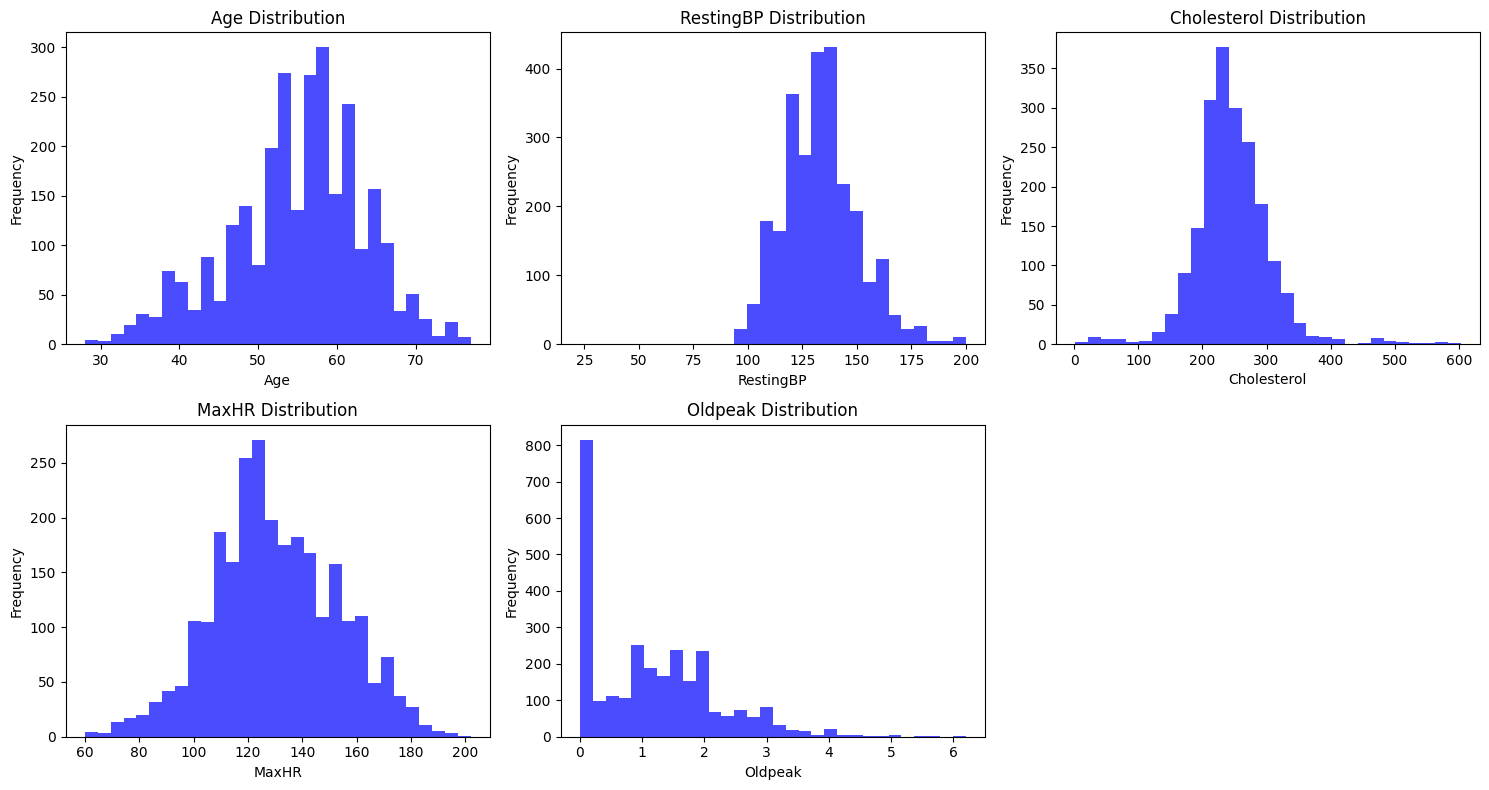

In [232]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are outliers in oldpeak and Cholesterol columns. we will drop them.

In [233]:
cholesterol_mean = df[(df['Cholesterol'] >= 100) & (df['Cholesterol'] <= 400)]['Cholesterol'].mean()

# Replace outliers with the mean
df['Cholesterol'] = df['Cholesterol'].apply(
    lambda x: cholesterol_mean if x < 100 or x > 400 else x
)

In [234]:
oldpeak_mean = df[df['Oldpeak'] <= 4]['Oldpeak'].mean()

# Replace outliers with the mean
df['Oldpeak'] = df['Oldpeak'].apply(
    lambda x: oldpeak_mean if x > 4 else x
)

In [235]:
df.shape

(2815, 12)

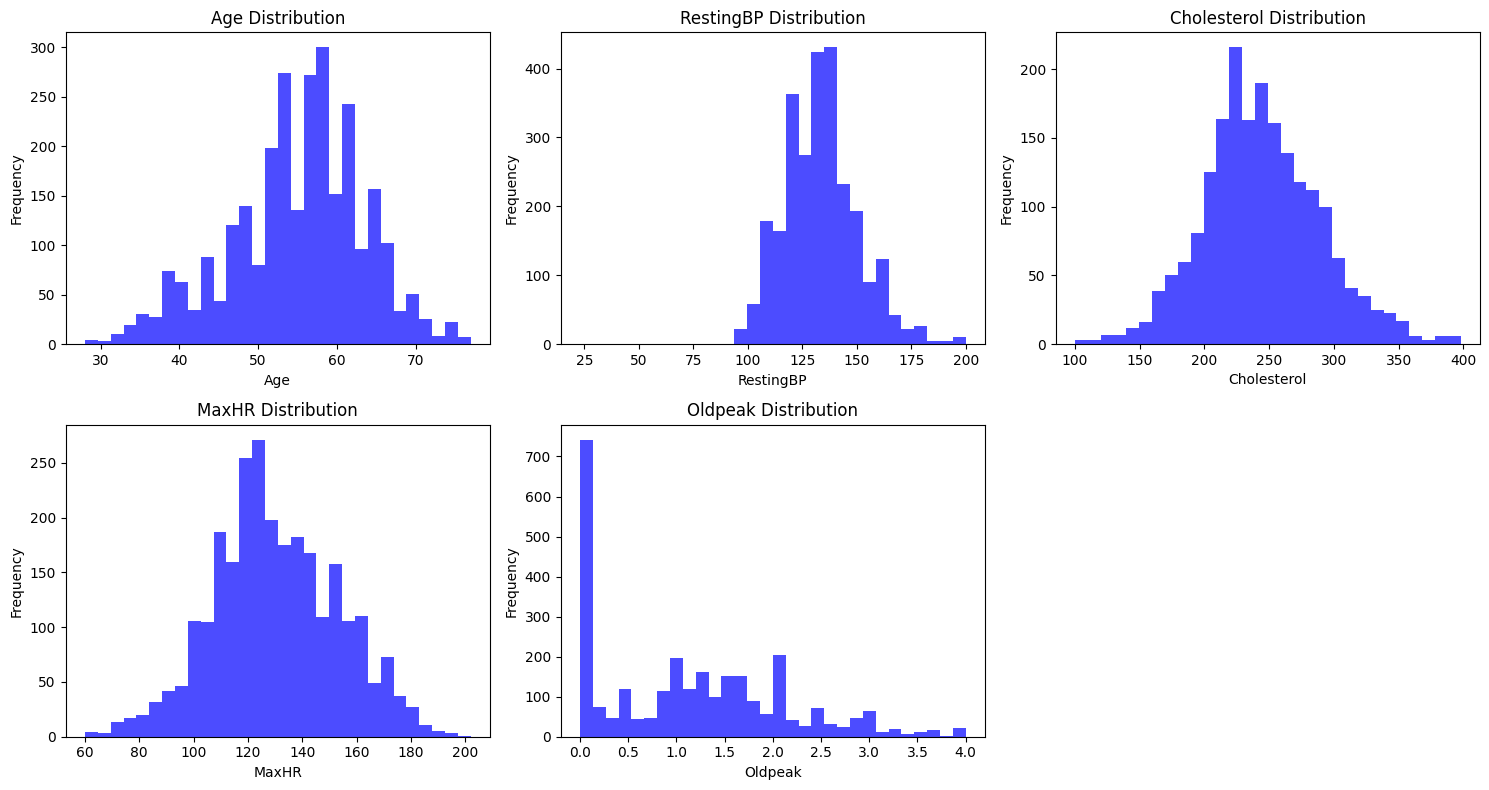

In [236]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## EDA and Get Insights

**Heart Disease Distribution**

In [237]:
patient_counts = df['HeartDisease'].value_counts()
patient_counts

HeartDisease
1    2397
0     418
Name: count, dtype: int64

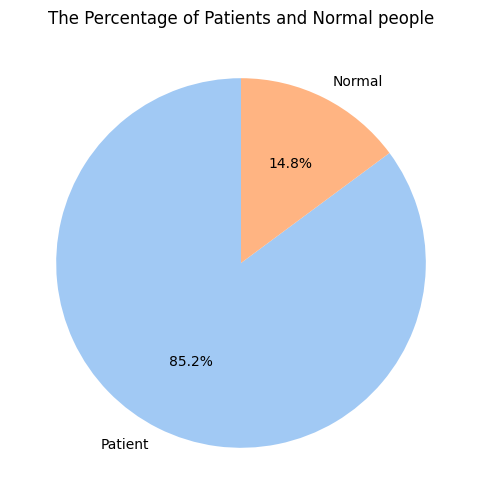

In [238]:
plt.figure(figsize=(8, 6))
plt.pie(patient_counts, 
        labels=['Patient', 'Normal'], 
        autopct='%.1f%%',
        colors=sns.color_palette('pastel'),
        startangle=90)

plt.title('The Percentage of Patients and Normal people')
plt.show()

**Age distribution**

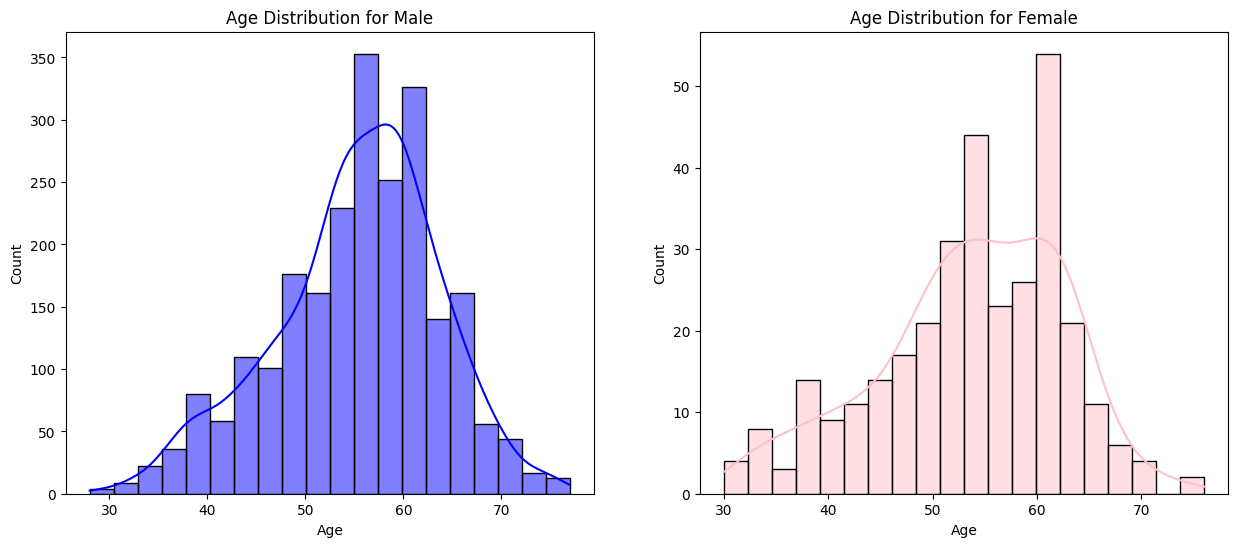

In [239]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df[df['Sex'] == 'Male']['Age'], color='blue', kde=True, bins=20)
plt.title('Age Distribution for Male')

plt.subplot(1,2,2)
sns.histplot(df[df['Sex'] == 'Female']['Age'], color='pink', kde=True, bins=20)
plt.title('Age Distribution for Female')

plt.show()

- Most Ranges of Age between 50 to 60 

In [240]:
df['Sex'].value_counts()

Sex
Male      2348
Female     323
Name: count, dtype: int64

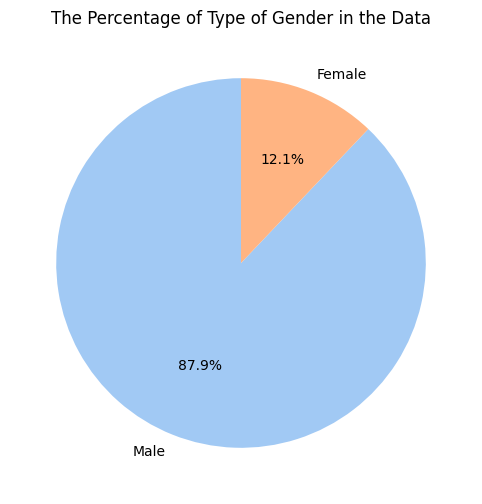

In [241]:
gender_counts = df['Sex'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, 
        labels=['Male', 'Female'], 
        autopct='%.1f%%',
        colors=sns.color_palette('pastel'),
        startangle=90)

plt.title('The Percentage of Type of Gender in the Data')
plt.show()

- Males are the dominant Category in the data

Chest Pain Type For each gender of Sex

In [242]:
df.groupby(['ChestPainType', 'Sex']).size().reset_index(name='Count')

,ChestPainType,Sex,Count
0,ASY,Female,188
1,ASY,Male,1769
2,ATA,Female,63
3,ATA,Male,144
4,NAP,Female,61
5,NAP,Male,356
6,TA,Female,11
7,TA,Male,79


In [243]:
pain_counts_long = df.groupby(['ChestPainType', 'Sex']).size().reset_index(name='Count')
pain_counts_long

,ChestPainType,Sex,Count
0,ASY,Female,188
1,ASY,Male,1769
2,ATA,Female,63
3,ATA,Male,144
4,NAP,Female,61
5,NAP,Male,356
6,TA,Female,11
7,TA,Male,79


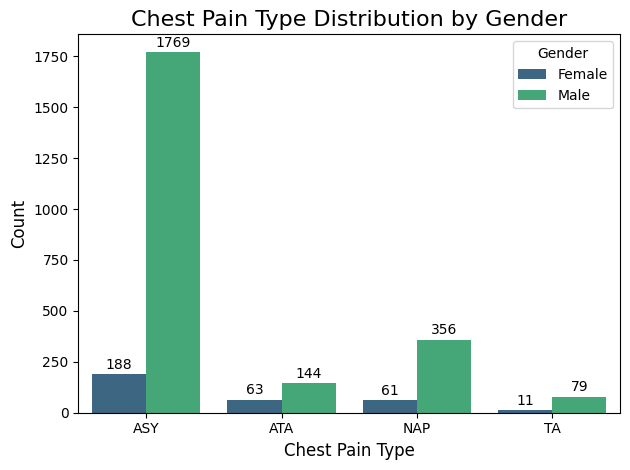

In [244]:
ax = sns.barplot(data=pain_counts_long, x='ChestPainType', y='Count', hue='Sex', palette='viridis', ci=None)

plt.title('Chest Pain Type Distribution by Gender', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10)

ax.legend(title='Gender')

plt.tight_layout()
plt.show()

Most Chest Pain Type 
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina

**Distribution of Resting Blood Pressure**

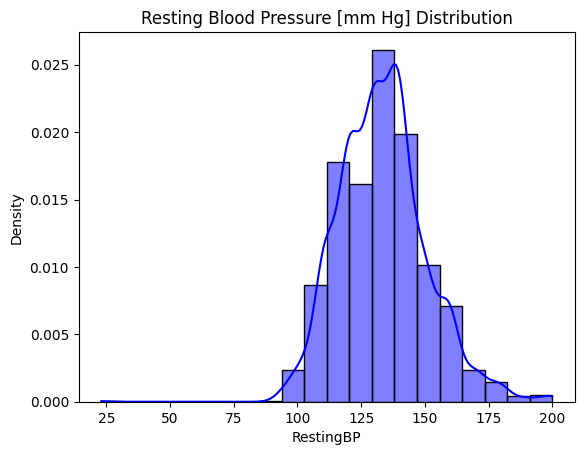

In [245]:
sns.histplot(df['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution');


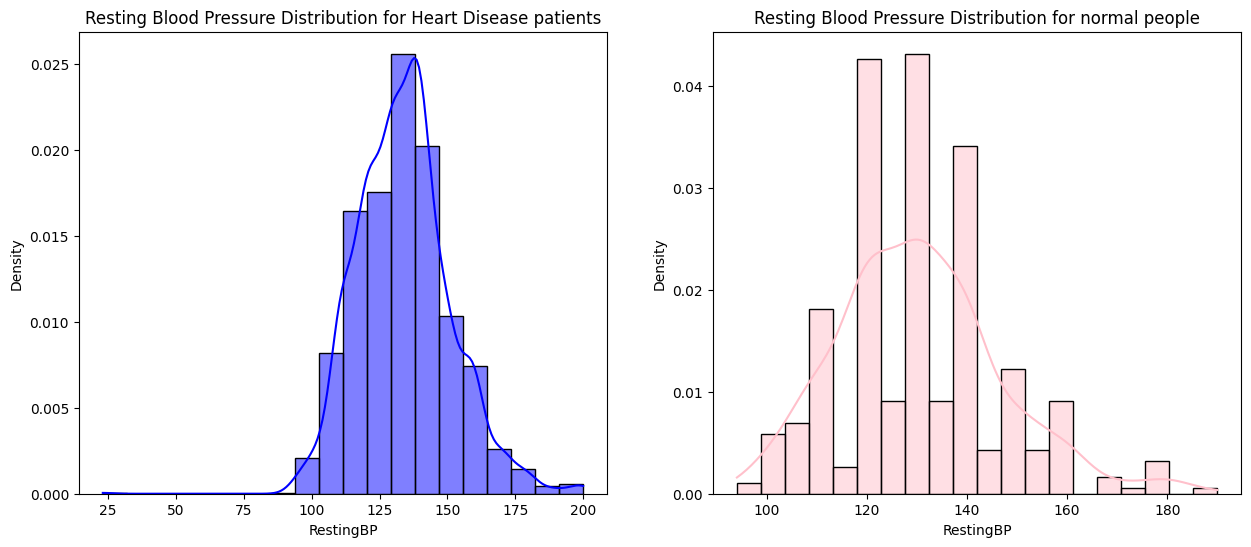

In [246]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)

sns.histplot(df[df['HeartDisease'] == 1]['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure Distribution for Heart Disease patients')

plt.subplot(1,2,2)

sns.histplot(df[df['HeartDisease'] == 0]['RestingBP'], color='pink', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure Distribution for normal people')

plt.show()

**Distribution of Cholesterol**

<Figure size 1500x600 with 0 Axes>

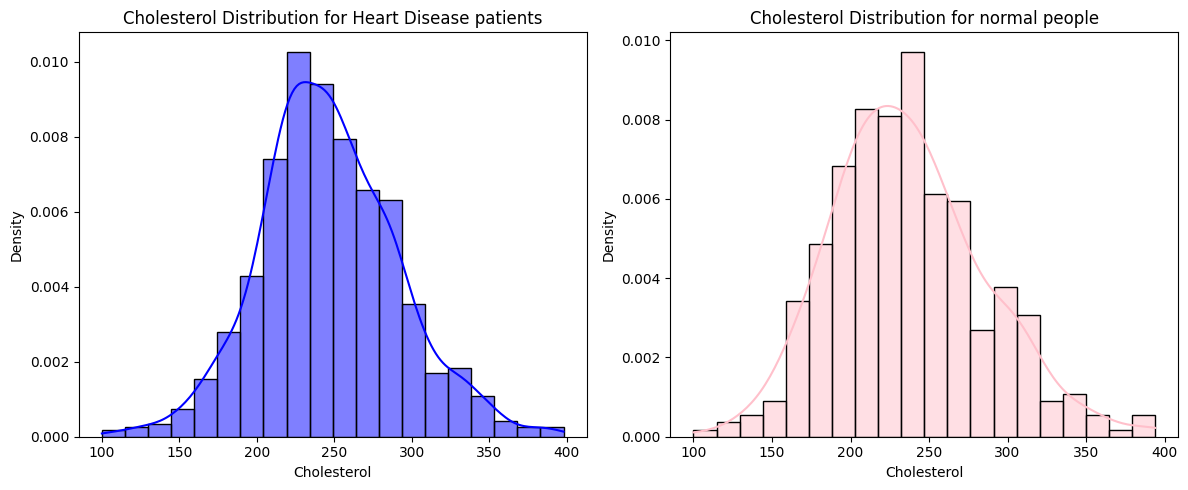

In [247]:
plt.figure(figsize=(15, 6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['HeartDisease'] == 1]['Cholesterol'], color='blue', kde=True, bins=20, stat='density', ax=axes[0])
axes[0].set_title('Cholesterol Distribution for Heart Disease patients')

sns.histplot(df[df['HeartDisease'] == 0]['Cholesterol'], color='pink', kde=True, bins=20, stat='density', ax=axes[1])
axes[1].set_title('Cholesterol Distribution for normal people')

plt.tight_layout()
plt.show()

Percentage of fasting For people has heart disease or not


معناه السكر فالدم ف الصيام 



In [248]:
df['FastingBS'].unique()

array([0, 1], dtype=int64)

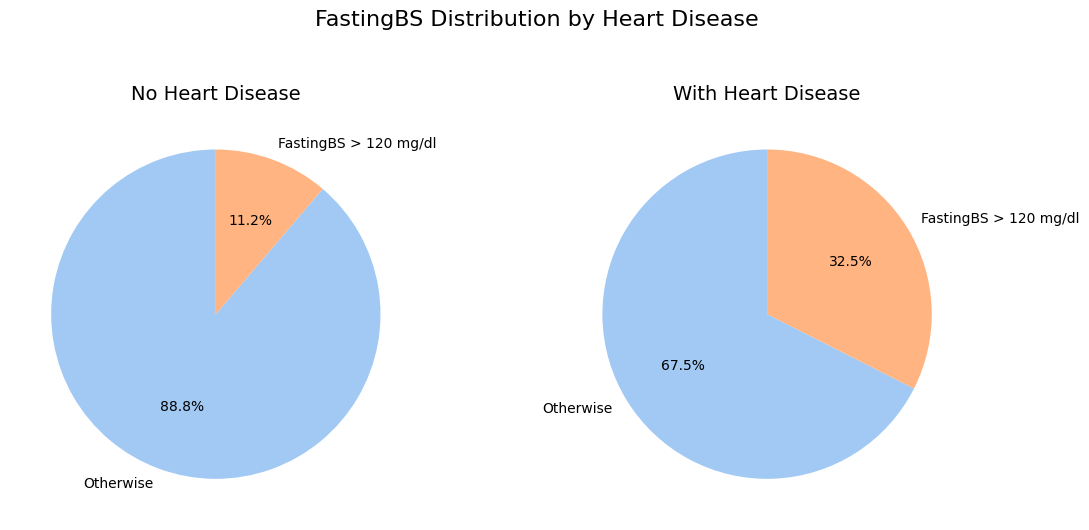

In [249]:
no_hd = df[df['HeartDisease'] == 0]['FastingBS'].value_counts()
yes_hd = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()

labels = ['Otherwise', 'FastingBS > 120 mg/dl']
colors = sns.color_palette('pastel')[0:2]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), facecolor='white')

axes[0].pie(
    no_hd,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'color': 'black'}
)
axes[0].set_title('No Heart Disease', fontsize=14, color='black')

axes[1].pie(
    yes_hd,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'color': 'black'}
)
axes[1].set_title('With Heart Disease', fontsize=14, color='black')

plt.suptitle('FastingBS Distribution by Heart Disease', fontsize=16, color='black', y=1.05)
plt.tight_layout()
plt.show()


A higher rate of fasting affects the appearance of heart disease in people

Distribution of Maximum Heart Rate Achieved (MaxHR)

قيم MaxHR المنخفضة أثناء المجهود البدني قد تشير إلى وجود مشاكل في القلب

<Figure size 1500x600 with 0 Axes>

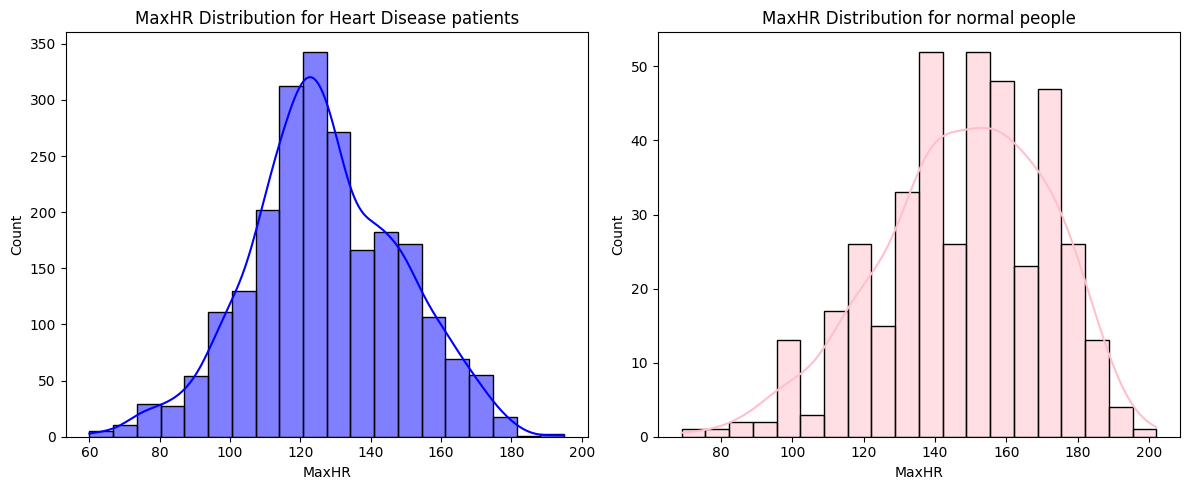

In [250]:
plt.figure(figsize=(15, 6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['HeartDisease'] == 1]['MaxHR'], color='blue', kde=True, bins=20, ax=axes[0])
axes[0].set_title('MaxHR Distribution for Heart Disease patients')

sns.histplot(df[df['HeartDisease'] == 0]['MaxHR'], color='pink', kde=True, bins=20, ax=axes[1])
axes[1].set_title('MaxHR Distribution for normal people')

plt.tight_layout()
plt.show();

Oldpeak for people has Heart Disease or not

* Oldpeak = 0.0: No ST depression → likely normal
* Oldpeak > 0  : ST segment dropped 1.4 mV → heart disease.

<Figure size 1500x600 with 0 Axes>

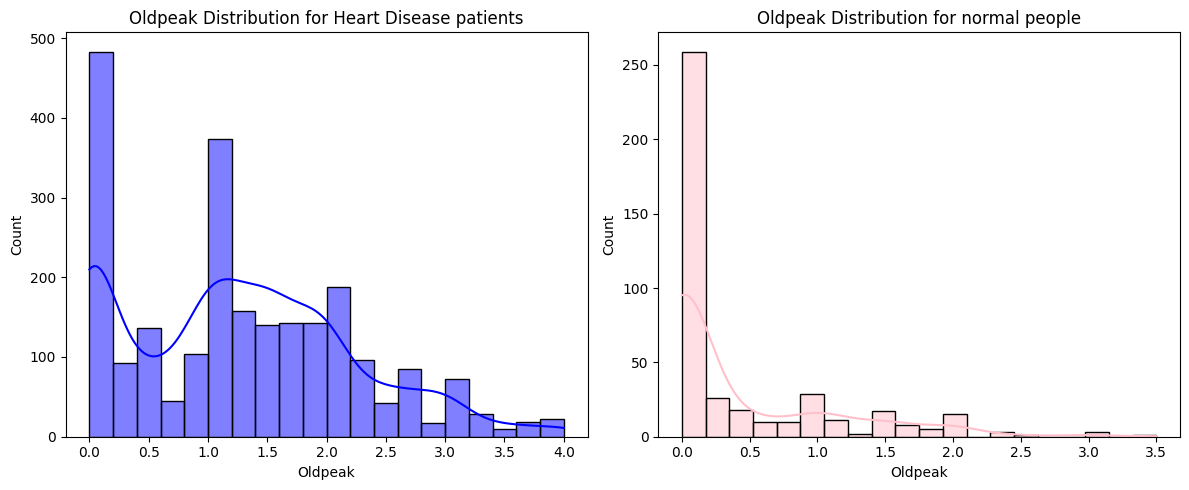

In [251]:
plt.figure(figsize=(15, 6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['HeartDisease'] == 1]['Oldpeak'], color='blue', kde=True, bins=20, ax=axes[0])
axes[0].set_title('Oldpeak Distribution for Heart Disease patients')

sns.histplot(df[df['HeartDisease'] == 0]['Oldpeak'], color='pink', kde=True, bins=20, ax=axes[1])
axes[1].set_title('Oldpeak Distribution for normal people')

plt.tight_layout()
plt.show();

Higher Oldpeak values are strongly correlated with the presence of Heart Disease

## Total Insights
- 85% of peoplein data have heart disease.
- Most Ranges of Age between 50 to 60 
- Males are the dominant Category in the data
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina
- A higher rate of fasting affects the appearance of heart disease in people
- Higher Oldpeak values are strongly correlated with the presence of Heart Disease

## Data Preprocessing

In [252]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289.0,0,Normal,172,No,0.0,Up,0
1,49,Female,NAP,160,180.0,0,Normal,156,No,1.0,Flat,1
2,37,Male,ATA,130,283.0,0,ST,98,No,0.0,Up,0
3,48,Female,ASY,138,214.0,0,Normal,108,Yes,1.5,Flat,1
4,54,Male,NAP,150,195.0,0,Normal,122,No,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2863,56,Male,ASY,110,NaN,0,LVH,137,Yes,1.2,Flat,1
2864,60,Male,ASY,120,222.0,0,LVH,137,NaN,1.8,Flat,1
2865,53,Male,ASY,122,255.0,0,Normal,115,NaN,0.2,Flat,1
2868,63,Male,ASY,179,NaN,0,Normal,99,NaN,0.0,Up,1


In [253]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           Int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               Int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### Classify columns

In [254]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_categorical = ['Sex', 'FastingBS', 'ExerciseAngina']
multiclass_categorical = ['ChestPainType', 'RestingECG', 'ST_Slope']
target_col = 'HeartDisease'

#### Split dataset

In [255]:
X = df.drop(columns=[target_col])
y = df[target_col]

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### built transformers

In [256]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

bin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary'))
])

multi_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num',   num_pipeline,    numerical_cols),
    ('bin',   bin_pipeline,    binary_categorical),
    ('multi', multi_pipeline,  multiclass_categorical)
], remainder='drop')

final_pipeline = Pipeline([

    ('preprocessor', preprocessor)
])

In [257]:
final_pipeline.fit(X_train, y_train)
X_train_processed = final_pipeline.transform(X_train)

X_test_processed  = final_pipeline.transform(X_test)

In [258]:
X_train_prep_df = pd.DataFrame(
    final_pipeline.fit_transform(X_train),
    columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

In [259]:
X_train_prep_df

,num__Age,num__RestingBP,num__Cholesterol,num__MaxHR,num__Oldpeak,bin__Sex_Male,bin__FastingBS_1,bin__ExerciseAngina_Yes,multi__ChestPainType_ASY,multi__ChestPainType_ATA,multi__ChestPainType_NAP,multi__ChestPainType_TA,multi__RestingECG_LVH,multi__RestingECG_Normal,multi__RestingECG_ST,multi__ST_Slope_Down,multi__ST_Slope_Flat,multi__ST_Slope_Up
0,-0.941017,-0.736179,-0.775535,-0.514393,1.624934,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.458160,-0.198625,1.297064,1.811917,-1.157046,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.574758,1.652948,-0.024218,-1.409127,-0.641864,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.474625,-0.556994,-0.438738,-1.140707,-1.157046,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.241428,1.115394,-0.024218,-1.095970,-1.157046,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,1.274347,1.055666,-0.024218,-2.259125,-0.847937,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2248,0.924552,0.876482,-0.024218,-2.527545,0.388499,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2249,0.574758,-0.795907,2.100196,-1.364390,-1.157046,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2250,0.224964,-0.795907,0.338487,0.559288,-0.847937,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [260]:
X_train_prep_df.isna().sum()

num__Age                    0
num__RestingBP              0
num__Cholesterol            0
num__MaxHR                  0
num__Oldpeak                0
bin__Sex_Male               0
bin__FastingBS_1            0
bin__ExerciseAngina_Yes     0
multi__ChestPainType_ASY    0
multi__ChestPainType_ATA    0
multi__ChestPainType_NAP    0
multi__ChestPainType_TA     0
multi__RestingECG_LVH       0
multi__RestingECG_Normal    0
multi__RestingECG_ST        0
multi__ST_Slope_Down        0
multi__ST_Slope_Flat        0
multi__ST_Slope_Up          0
dtype: int64

In [261]:
X_test_prep_df = pd.DataFrame(
    final_pipeline.fit_transform(X_test),
    columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

In [262]:
X_test_prep_df

,num__Age,num__RestingBP,num__Cholesterol,num__MaxHR,num__Oldpeak,bin__Sex_Male,bin__FastingBS_1,bin__ExerciseAngina_Yes,multi__ChestPainType_ASY,multi__ChestPainType_ATA,multi__ChestPainType_NAP,multi__ChestPainType_TA,multi__RestingECG_LVH,multi__RestingECG_Normal,multi__RestingECG_ST,multi__ST_Slope_Down,multi__ST_Slope_Flat,multi__ST_Slope_Up
0,-0.370031,-0.716907,-0.063241,-0.850193,0.833844,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.370031,-0.474220,-0.736158,0.242012,-1.215180,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.235925,1.649290,1.417176,0.879131,1.755905,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.733605,-1.444967,-0.063241,-0.076548,-0.600473,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.235925,-0.170861,0.286676,0.242012,-0.498022,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.720690,-0.079854,1.282593,-0.622650,-1.215180,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
559,-0.370031,0.071825,-0.063241,-0.031040,0.833844,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
560,1.084263,0.496527,-0.063241,-2.579516,-0.293119,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
561,-1.581944,-1.566311,0.004732,0.606080,0.936295,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Modeling

In [263]:
from sklearn import set_config

In [264]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # base model
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

In [265]:
val_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='accuracy')
    val_scores[name] = scores
    print(name)
    print('-' * len(name))
    print(f"Cross-validation scores: {scores}")
    print(f"Mean CV Accuracy: {np.mean(scores):.4f}")
    print(f"Std CV Accuracy: {np.std(scores):.4f}\n")

Logistic Regression
-------------------
Cross-validation scores: [0.90465632 0.92682927 0.93111111 0.94       0.90888889]
Mean CV Accuracy: 0.9223
Std CV Accuracy: 0.0134

Random Forest
-------------
Cross-validation scores: [0.9113082  0.94456763 0.95777778 0.95555556 0.93777778]
Mean CV Accuracy: 0.9414
Std CV Accuracy: 0.0167

Decision Tree
-------------
Cross-validation scores: [0.90909091 0.91796009 0.92       0.92       0.90666667]
Mean CV Accuracy: 0.9147
Std CV Accuracy: 0.0057

XGBoost
-------
Cross-validation scores: [0.92239468 0.95343681 0.95777778 0.96666667 0.94888889]
Mean CV Accuracy: 0.9498
Std CV Accuracy: 0.0149



The `XGBClassifier` is the best for our dataset, delivering both higher accuracy and a lower std (0.0062 versus 0.0110 for the `RandomForestClassifier`). While the `RandomForestClassifier` also performs well, its higher std of 0.0110 makes it less consistent than `XGBClassifier`.

#### XGBoost model

In [266]:
xgb_pipeline = Pipeline([
    ('final_pipeline', final_pipeline),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
])

In [267]:
set_config(display='diagram')

xgb_pipeline  # هيطبعلك شكل الشجرة

Pipeline(steps=[('final_pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['Age',
                                                                    'RestingBP',
                                                                    'Cholesterol',
                                                                    'MaxHR',
                                                                    'Oldpeak']),
                                                                  ('bin',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(dr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [268]:
xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9502664298401421
              precision    recall  f1-score   support

           0       0.91      0.69      0.79        75
           1       0.95      0.99      0.97       488

    accuracy                           0.95       563
   macro avg       0.93      0.84      0.88       563
weighted avg       0.95      0.95      0.95       563



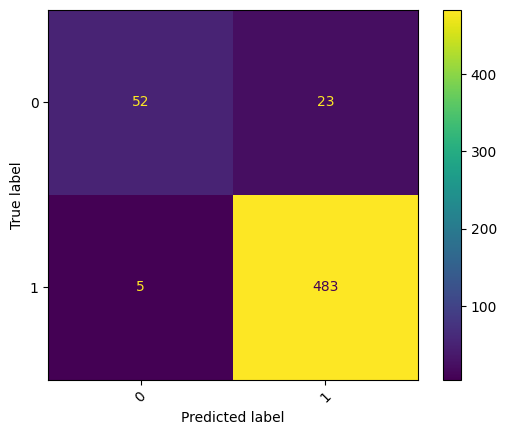

In [269]:
ConfusionMatrixDisplay.from_estimator(xgb_pipeline,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

#### Random Forest model

In [270]:
rf_pipeline = Pipeline([
    ('final_pipeline', final_pipeline),
    ('Random Forest', RandomForestClassifier(random_state=42))
])

In [271]:
rf_pipeline

Pipeline(steps=[('final_pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['Age',
                                                                    'RestingBP',
                                                                    'Cholesterol',
                                                                    'MaxHR',
                                                                    'Oldpeak']),
                                                                  ('bin',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['Sex',
                                                                    'FastingBS',
                                                                    'ExerciseAngina']),
                                                                  ('multi',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['ChestPainType',
                                                                    'RestingECG',
                                                                    'ST_Slope'])]))])),
                ('Random Forest', RandomForestClassifier(random_state=42))])

In [272]:
param_grid = {
    'Random Forest__n_estimators': [100, 200, 300],
    'Random Forest__max_depth': [None, 10, 20, 30],
    'Random Forest__min_samples_split': [2, 5, 10],
    'Random Forest__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('final_pipeline',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['Age',
                                                                                           'RestingBP',
                                                                                           'Cholesterol',
                                                                                           'MaxHR',
                                                                                           'Oldpeak']),
                                                                                         ('bin',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='most_frequent')...
                                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                                          ['ChestPainType',
                                                                                           'RestingECG',
                                                                                           'ST_Slope'])]))])),
                                       ('Random Forest',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'Random Forest__max_depth': [None, 10, 20, 30],
                         'Random Forest__min_samples_leaf': [1, 2, 4],
                         'Random Forest__min_samples_split': [2, 5, 10],
                         'Random Forest__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [273]:
rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9502664298401421
              precision    recall  f1-score   support

           0       0.93      0.68      0.78        75
           1       0.95      0.99      0.97       488

    accuracy                           0.95       563
   macro avg       0.94      0.84      0.88       563
weighted avg       0.95      0.95      0.95       563



In [275]:
cv_results = pd.DataFrame(grid_search.cv_results_)
print(len(cv_results))
cv_results.head()

108


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random Forest__max_depth,param_Random Forest__min_samples_leaf,param_Random Forest__min_samples_split,param_Random Forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.517575,0.080382,0.030512,0.006462,None,1,2,100,"{'Random Forest__max_depth': None, 'Random For...",0.909091,0.946785,0.955556,0.953333,0.944444,0.941842,0.016876,8
1,0.969995,0.112740,0.043245,0.006411,None,1,2,200,"{'Random Forest__max_depth': None, 'Random For...",0.913525,0.949002,0.960000,0.953333,0.937778,0.942728,0.016294,1
2,1.336702,0.043316,0.059461,0.010137,None,1,2,300,"{'Random Forest__max_depth': None, 'Random For...",0.915743,0.949002,0.957778,0.953333,0.937778,0.942727,0.015040,4
3,0.443046,0.031264,0.025587,0.001754,None,1,5,100,"{'Random Forest__max_depth': None, 'Random For...",0.917960,0.944568,0.955556,0.948889,0.933333,0.940061,0.013206,14
4,0.836378,0.027684,0.065242,0.024986,None,1,5,200,"{'Random Forest__max_depth': None, 'Random For...",0.913525,0.944568,0.953333,0.946667,0.933333,0.938285,0.013955,22


In [277]:
print(grid_search.best_params_)
print("-------------")
print(grid_search.best_score_)
print("-------------")
print(grid_search.best_estimator_)

{'Random Forest__max_depth': None, 'Random Forest__min_samples_leaf': 1, 'Random Forest__min_samples_split': 2, 'Random Forest__n_estimators': 200}
-------------
0.9427277654594727
-------------
Pipeline(steps=[('final_pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['Age',
                                                                    'RestingBP',
                                                                    'Choleste

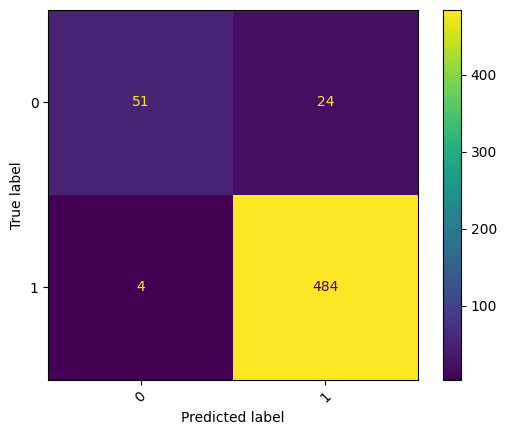

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_pipeline,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

## Save Models 

**Save xgb_pipeline model**

In [ ]:
joblib.dump(xgb_pipeline, 'xgb_model.sav')

['xgb_model.sav']

**Save rf_pipeline model**

In [ ]:
joblib.dump(rf_pipeline,'rf_pipeline.sav')

['rf_pipeline.sav']